<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n250.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,77.405631,0.001697,87.407328,87.405793,0.001535
1,0.0,1.0,23.865635,-0.009077,33.856558,33.865843,-0.009285
2,0.0,2.0,63.799364,0.000354,73.799718,73.799537,0.000181
3,0.0,3.0,29.591322,-0.000972,39.590351,39.591525,-0.001175
4,0.0,4.0,36.018545,0.004093,46.022639,46.018743,0.003896
...,...,...,...,...,...,...,...
119995,999.0,115.0,84.064040,0.000524,94.064564,94.064454,0.000110
119996,999.0,116.0,48.174604,0.000006,58.174610,58.173652,0.000957
119997,999.0,117.0,54.834027,0.000590,64.834617,64.833329,0.001288
119998,999.0,118.0,71.390549,0.000267,81.390815,81.390480,0.000335


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,77.405631,0.001697,87.407328,87.405793,0.001535
1,0.0,1.0,23.865635,-0.009077,33.856558,33.865843,-0.009285
2,0.0,2.0,63.799364,0.000354,73.799718,73.799537,0.000181
3,0.0,3.0,29.591322,-0.000972,39.590351,39.591525,-0.001175
4,0.0,4.0,36.018545,0.004093,46.022639,46.018743,0.003896
...,...,...,...,...,...,...,...
119995,999.0,115.0,84.064040,0.000524,94.064564,94.064454,0.000110
119996,999.0,116.0,48.174604,0.000006,58.174610,58.173652,0.000957
119997,999.0,117.0,54.834027,0.000590,64.834617,64.833329,0.001288
119998,999.0,118.0,71.390549,0.000267,81.390815,81.390480,0.000335


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    77.405631  0.001697  87.407328  87.405793  0.001535
      1.0    23.865635 -0.009077  33.856558  33.865843 -0.009285
      2.0    63.799364  0.000354  73.799718  73.799537  0.000181
      3.0    29.591322 -0.000972  39.590351  39.591525 -0.001175
      4.0    36.018545  0.004093  46.022639  46.018743  0.003896
...                ...       ...        ...        ...       ...
999.0 115.0  84.064040  0.000524  94.064564  94.064454  0.000110
      116.0  48.174604  0.000006  58.174610  58.173652  0.000957
      117.0  54.834027  0.000590  64.834617  64.833329  0.001288
      118.0  71.390549  0.000267  81.390815  81.390480  0.000335
      119.0  87.096462 -0.000284  97.096177  97.096991 -0.000814

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    77.405631  0.001697  87.407328  87.405793  0.001535
      1.0    23.865635 -0.009077  33.856558  33.865843 -0.009285
      2.0    63.799364  0.000354  73.799718  73.799537  0.000181
      3.0    29.591322 -0.000972  39.590351  39.591525 -0.001175
      4.0    36.018545  0.004093  46.022639  46.018743  0.003896
...                ...       ...        ...        ...       ...
999.0 115.0  84.064040  0.000524  94.064564  94.064454  0.000110
      116.0  48.174604  0.000006  58.174610  58.173652  0.000957
      117.0  54.834027  0.000590  64.834617  64.833329  0.001288
      118.0  71.390549  0.000267  81.390815  81.390480  0.000335
      119.0  87.096462 -0.000284  97.096177  97.096991 -0.000814

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,77.405631,0.001697,87.407328,87.405793,0.001535
1,0.0,1.0,23.865635,-0.009077,33.856558,33.865843,-0.009285
2,0.0,2.0,63.799364,0.000354,73.799718,73.799537,0.000181
3,0.0,3.0,29.591322,-0.000972,39.590351,39.591525,-0.001175
4,0.0,4.0,36.018545,0.004093,46.022639,46.018743,0.003896
...,...,...,...,...,...,...,...
119995,999.0,115.0,84.064040,0.000524,94.064564,94.064454,0.000110
119996,999.0,116.0,48.174604,0.000006,58.174610,58.173652,0.000957
119997,999.0,117.0,54.834027,0.000590,64.834617,64.833329,0.001288
119998,999.0,118.0,71.390549,0.000267,81.390815,81.390480,0.000335


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    77.405631  0.001697  87.407328  87.405793  0.001535
      1.0    23.865635 -0.009077  33.856558  33.865843 -0.009285
      2.0    63.799364  0.000354  73.799718  73.799537  0.000181
      3.0    29.591322 -0.000972  39.590351  39.591525 -0.001175
      4.0    36.018545  0.004093  46.022639  46.018743  0.003896
...                ...       ...        ...        ...       ...
999.0 115.0  84.064040  0.000524  94.064564  94.064454  0.000110
      116.0  48.174604  0.000006  58.174610  58.173652  0.000957
      117.0  54.834027  0.000590  64.834617  64.833329  0.001288
      118.0  71.390549  0.000267  81.390815  81.390480  0.000335
      119.0  87.096462 -0.000284  97.096177  97.096991 -0.000814

[120000 rows x 5 columns]

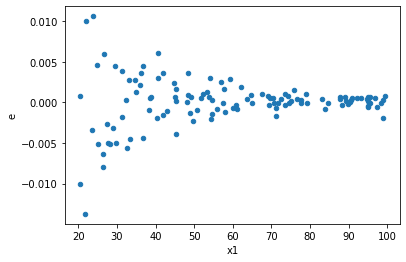

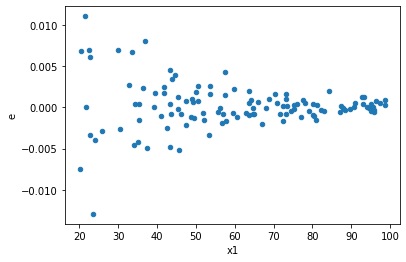

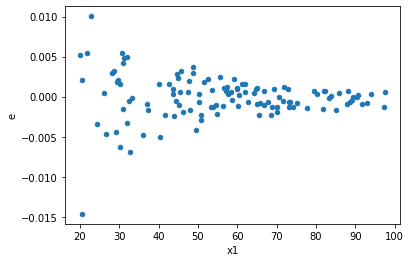

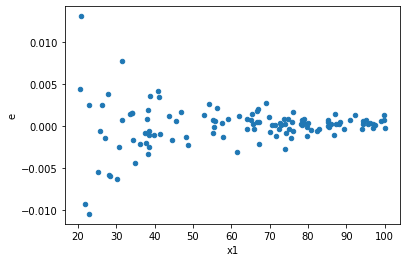

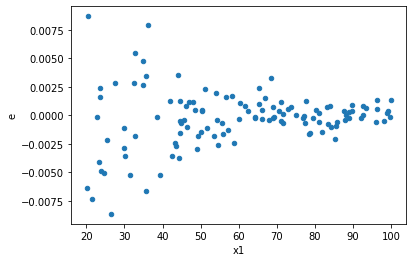

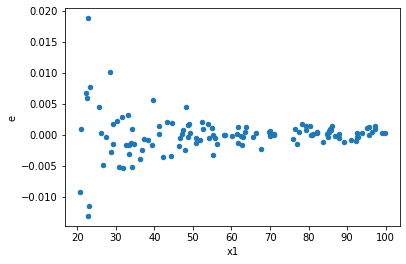

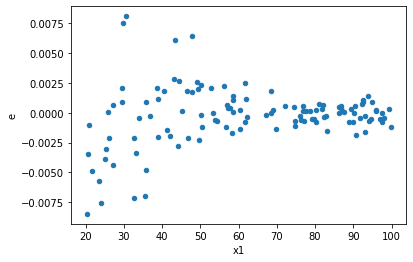

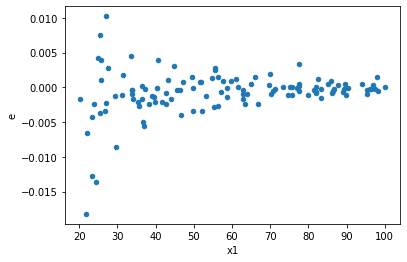

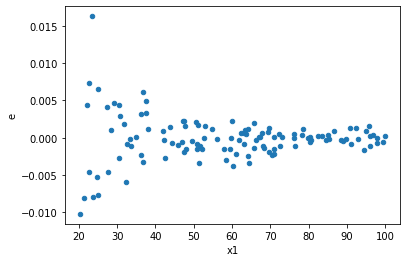

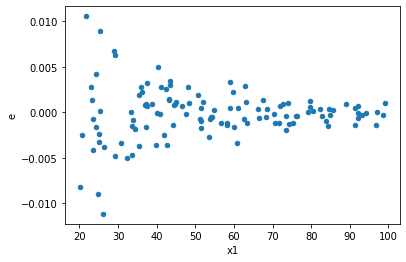

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,0.001104801764256657,2.712705572399803e-05,2.3506420516099083e-05,5.771713983829368e-07,0.02455377661552696,8.036344386060197e-26,Reject005=0 : Heteroscedasticity
1.0,47.0,47.0,0.0007787227305217226,4.822010279584177e-05,1.6568568734504737e-05,1.0259596339540801e-06,0.06192204350261567,4.419707414553923e-17,Reject005=0 : Heteroscedasticity
2.0,47.0,47.0,0.000892359524796361,3.238625063403254e-05,1.898637286800768e-05,6.890691624262243e-07,0.03629282787273793,4.680209155242122e-22,Reject005=0 : Heteroscedasticity
3.0,47.0,47.0,0.000704296164841676,3.6608363808894434e-05,1.4985024783865447e-05,7.789013576360518e-07,0.05197864994355592,1.1033515236260354e-18,Reject005=0 : Heteroscedasticity
4.0,47.0,47.0,0.001007714428993086,4.428401412403104e-05,2.1440732531767786e-05,9.422130664687455e-07,0.04394500351481508,3.013159649939485e-20,Reject005=0 : Heteroscedasticity
5.0,47.0,47.0,0.0006078141841990498,3.8193242426247715e-05,1.2932216685086167e-05,8.126221792818663e-07,0.06283703707338954,6.001716120417643e-17,Reject005=0 : Heteroscedasticity
6.0,47.0,47.0,0.0005742513461259173,3.040626697041528e-05,1.2218113747359942e-05,6.469418504343677e-07,0.05294940477814402,1.6350787546007343e-18,Reject005=0 : Heteroscedasticity
7.0,47.0,47.0,0.0007199954700383007,2.9191917850524638e-05,1.5319052554006398e-05,6.211046351175455e-07,0.040544585438810815,5.258335924051408e-21,Reject005=0 : Heteroscedasticity
8.0,47.0,47.0,0.0008385728788230675,4.461131353816732e-05,1.784197614517165e-05,9.491768837907941e-07,0.05319908938717296,1.806837079490601e-18,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64